In [8]:
# --- Cell 1: imports ---
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri


In [9]:
# --- Cell 2: paths (run from inside "data/" folder) ---
ROOT = "."          # you are in data/
DIR2D_st = os.path.join(ROOT, "2d_st")
DIR2D = os.path.join(ROOT, "2d")
NODES_CSV = os.path.join(DIR2D, "nodes.csv")
CELLS_CSV = os.path.join(DIR2D, "cells.csv")
TIME_CSV = os.path.join(ROOT, "istanti_t.csv")

CENT_DIR = os.path.join(DIR2D_st, "centroidi", "Funzione_test")
CENT_FILES = sorted(glob.glob(os.path.join(CENT_DIR, "Funzione_test_*.csv")))

OBS_DIR = os.path.join(DIR2D_st, "Funzione_test")
OBS_FILES = sorted(glob.glob(os.path.join(OBS_DIR, "*.csv")))

print("Centroid files:")
for f in CENT_FILES:
    print("  ", f)

print("\nObservation candidate files in 2d/Funzione_test/:")
for f in OBS_FILES:
    print("  ", f)


Centroid files:
   ./2d_st/centroidi/Funzione_test/Funzione_test_0.csv
   ./2d_st/centroidi/Funzione_test/Funzione_test_1.csv

Observation candidate files in 2d/Funzione_test/:
   ./2d_st/Funzione_test/Funzione_test_0.csv
   ./2d_st/Funzione_test/Funzione_test_1.csv


In [10]:
# --- Cell 3: load mesh and build triangulation spaziale---
nodes = np.loadtxt(NODES_CSV, delimiter=",")
cells = np.loadtxt(CELLS_CSV, delimiter=",", dtype=int)
time = np.loadtxt(TIME_CSV, delimiter=",")

x = nodes[:, 0]
y = nodes[:, 1]
tri = mtri.Triangulation(x, y, cells)
t = time[:]
tot_nodi = len(x)
tot_time = len(t)
print("nodes:", nodes.shape, "cells:", cells.shape, "time: ", time.shape, "tot nodi", tot_nodi, "tot time", tot_time)


nodes: (961, 2) cells: (1800, 3) time:  (100,) tot nodi 961 tot time 100


In [11]:
# --- Cell 4: plotting helper ---
def plot_on_mesh(values, title="", levels=50):
    values = np.asarray(values).reshape(-1)
    assert values.shape[0] == x.shape[0], f"Expected {x.shape[0]} values, got {values.shape[0]}"

    plt.figure(figsize=(6, 5))
    cf = plt.tricontourf(tri, values, levels=levels)
    plt.colorbar(cf)
    plt.title(title)
    plt.axis("equal")
    plt.tight_layout()
    plt.show()


Loaded centroid file: ./2d_st/centroidi/Funzione_test/Funzione_test_0.csv shape: (2, 96100)


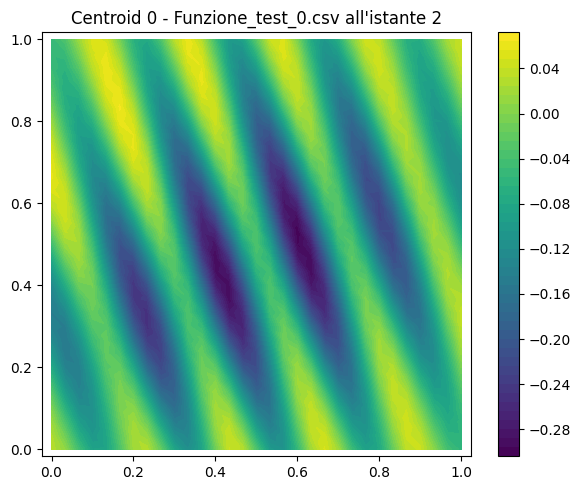

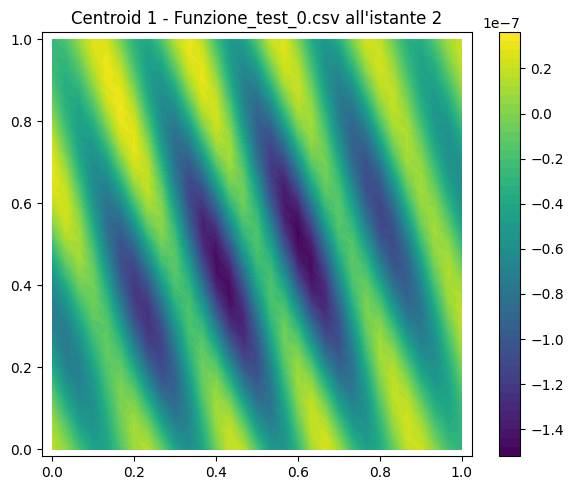

In [12]:
# --- Cell 5: plot ALL centroids from a centroid file ad un istante di tempo
centroid_file = CENT_FILES[0]  # e.g. Funzione_test_0.csv 
C = np.loadtxt(centroid_file, delimiter=",")

print("Loaded centroid file:", centroid_file, "shape:", C.shape)
T_time = 2
if C.ndim == 1:
    plot_on_mesh(C[T_time*tot_nodi:(T_time*tot_nodi+tot_nodi)], title=f"Centroid (single) from {os.path.basename(centroid_file)} all'istante {T_time}")
else:
    for k in range(C.shape[0]):
        plot_on_mesh(C[k, T_time*tot_nodi:(T_time*tot_nodi+tot_nodi)], title=f"Centroid {k} - {os.path.basename(centroid_file)} all'istante {T_time}")


In [13]:
def plot_node_over_time(centroid_flat, node_idx, tot_nodi):
    """
    centroid_flat : array 1D di lunghezza (T * tot_nodi)
    node_idx      : indice del nodo spaziale
    tot_nodi      : numero nodi spazio
    """
    assert centroid_flat.ndim == 1, "Serve un vettore 1D (un centroide)"
    assert node_idx < tot_nodi, "node_idx fuori range"

    T = centroid_flat.size // tot_nodi
    assert T * tot_nodi == centroid_flat.size, "Dimensioni non compatibili"

    values = centroid_flat[node_idx::tot_nodi]
    t = np.linspace(0.0, 1.0, T)   # include sia 0 che 1
    plt.figure()
    plt.plot(t,values, marker="o")
    plt.xlabel("time index")
    plt.ylabel("value")
    plt.title(f"Node {node_idx} value over time")
    plt.grid(True)
    plt.show()


Loaded centroid file: ./2d_st/centroidi/Funzione_test/Funzione_test_0.csv shape: (2, 96100)


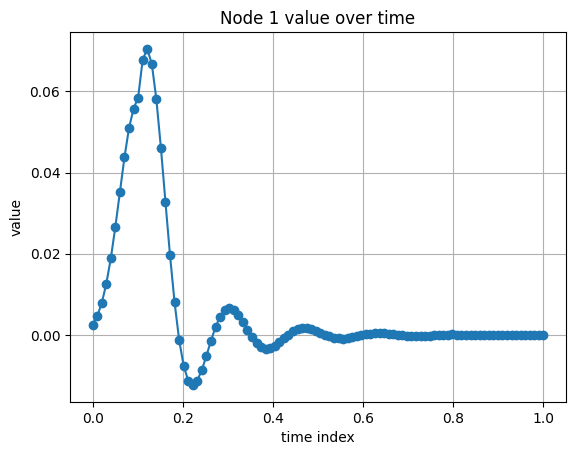

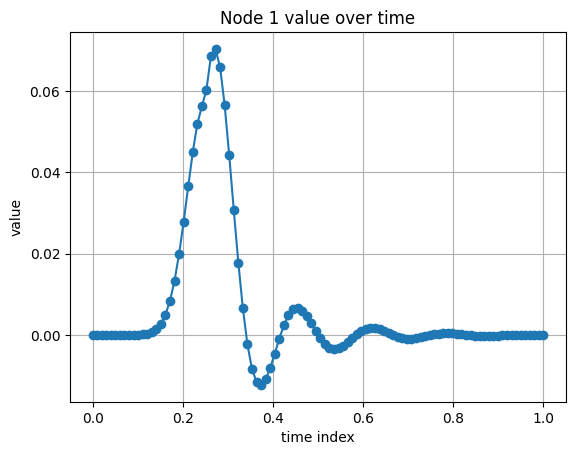

In [16]:
# --- Cell plot cetroidi temporali in nodo 
centroid_file = CENT_FILES[0]  # e.g. Funzione_test_0.csv 
C = np.loadtxt(centroid_file, delimiter=",")

print("Loaded centroid file:", centroid_file, "shape:", C.shape)
T_time = 2
if C.ndim == 1:
    plot_node_over_time(C,1,tot_nodi)
else:
    for k in range(C.shape[0]):
        plot_node_over_time(C[k,:],1,tot_nodi)


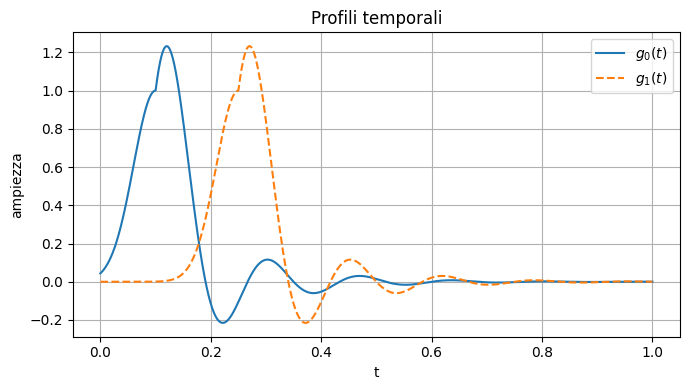

In [2]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

def heaviside(x):
    return np.where(x >= 0.0, 1.0, 0.0)

def temporal_profile(t, t0, A, sigma_t, B, f, gamma):
    dt = t - t0
    # picco gaussiano
    peak = A * np.exp(-(dt**2) / (2.0 * sigma_t**2))
    # oscillazione smorzata che parte dopo t0
    osc = B * np.sin(2.0 * pi * f * dt) * np.exp(-gamma * dt) * heaviside(dt)
    return peak + osc

# parametri
t0_0 = 0.10
Delta_t0 = 0.15
t0_1 = t0_0 + Delta_t0

A = 1.0
sigma_t = 0.04
B = 0.6
f = 6.0
gamma = 8.0

# griglia temporale
t = np.linspace(0.0, 1.0, 2000)

# funzioni
g0 = temporal_profile(t, t0_0, A, sigma_t, B, f, gamma)
g1 = temporal_profile(t, t0_1, A, sigma_t, B, f, gamma)

# plot
plt.figure(figsize=(7,4))
plt.plot(t, g0, label=r"$g_0(t)$")
plt.plot(t, g1, label=r"$g_1(t)$", linestyle="--")
plt.xlabel("t")
plt.ylabel("ampiezza")
plt.title("Profili temporali")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
